In [3]:
# Import Libraries 

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 


# Read in the data 

df = pd.read_csv('/Users/rimosman/Desktop/movies.csv')



In [2]:
# Let's look at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col]).isnull())
    print('{} - {}%'.format(col, pct_missing))
    

SyntaxError: unmatched ')' (2497472510.py, line 4)

In [4]:
df.isnull().values.any()

np.True_

In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Data types for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
# Change data type of columns 

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')


In [20]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')


In [10]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [59]:
# Create Correct Year Column 

df['yearcorrect'] = df['released'].astype(str).str.extract(r'(\d{4})')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_millions,gross_millions
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,NaN,237.0,2847.246203
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,NaN,356.0,2797.501328
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,NaN,200.0,2201.647264
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,NaN,245.0,2069.521700
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,NaN,321.0,2048.359754


In [22]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [23]:
pd.set_option('display.max_rows', None)

In [62]:
# Drop any duplicates

df.drop_duplicates


<bound method DataFrame.drop_duplicates of       name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1

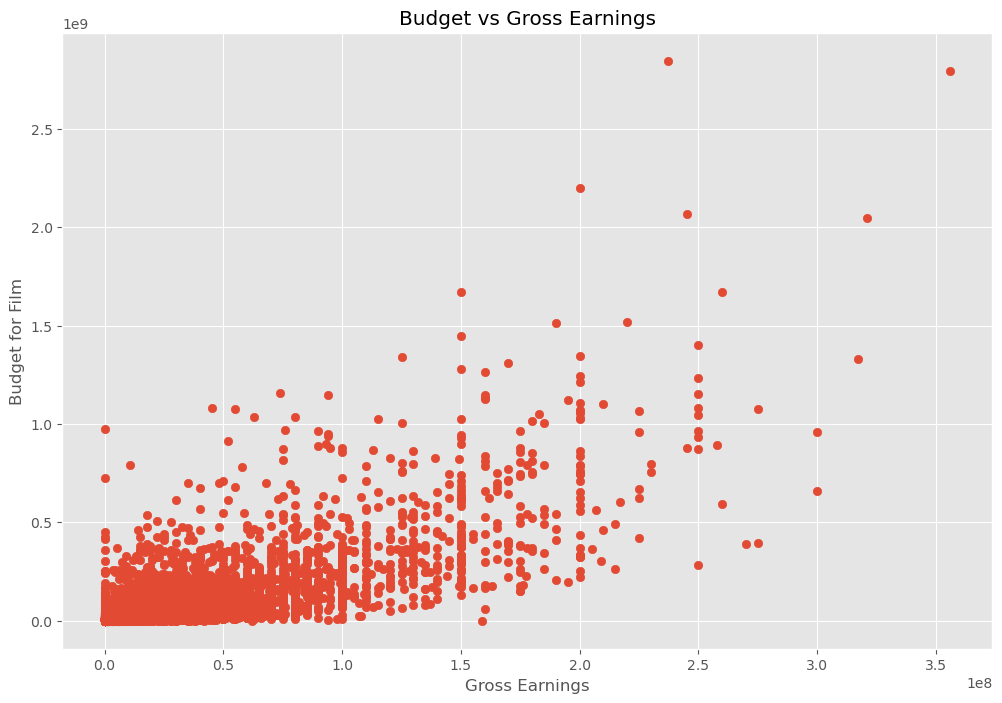

In [63]:
# Scatter plot with Budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.title('Budget vs Gross Earnings')
plt.show()

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [25]:
df['budget_millions'] = df['budget'] / 1e6
df['gross_millions'] = df['gross'] / 1e6


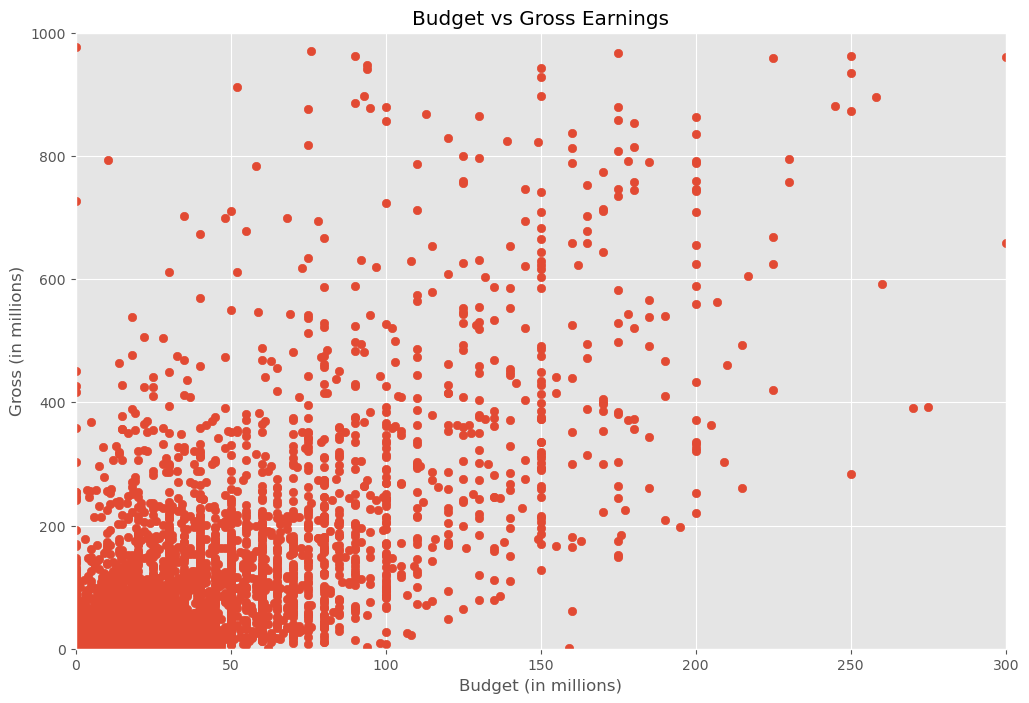

In [26]:
plt.scatter(x=df['budget_millions'], y=df['gross_millions'])
plt.xlabel('Budget (in millions)')
plt.ylabel('Gross (in millions)')
plt.title('Budget vs Gross Earnings')
plt.xlim(0, 300)
plt.ylim(0, 1000)
plt.show()


In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_millions,gross_millions
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,237.0,2847.246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,356.0,2797.501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,200.0,2201.647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,245.0,2069.521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,321.0,2048.359754


In [32]:
# Plot budget versus gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws= {"color": "red"}, line_kws= {"color": "blue"})

<Axes: xlabel='budget', ylabel='gross'>

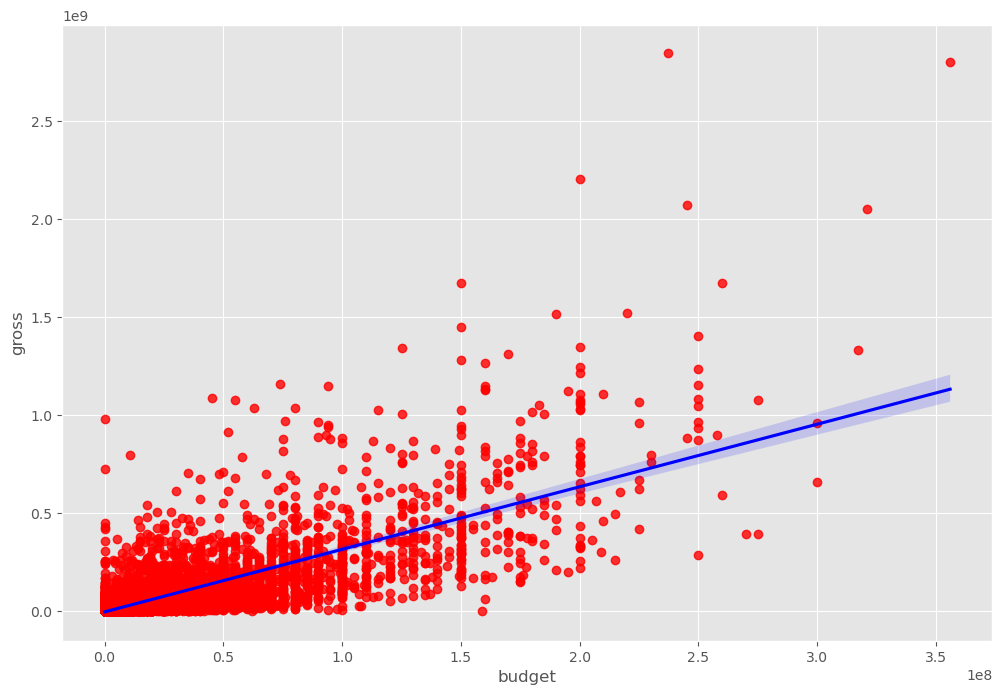

In [33]:
plt.show()

In [42]:
# Let's start looking at correlation 

df.corr(method = 'pearson', numeric_only=True) 

# try different types or methods of correlation 'pearson' which is usually it's by default, 'kendall', 'spearman'


,year,score,votes,budget,gross,runtime,budget_millions,gross_millions
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.309212,0.261900
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.055665,0.186392
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.486862,0.632834
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,1.000000,0.750157
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.750157,1.000000
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.269510,0.245235
budget_millions,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,1.000000,0.750157
gross_millions,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.750157,1.000000


In [43]:
# Conclusion: There is a high correlation between budget and gross 

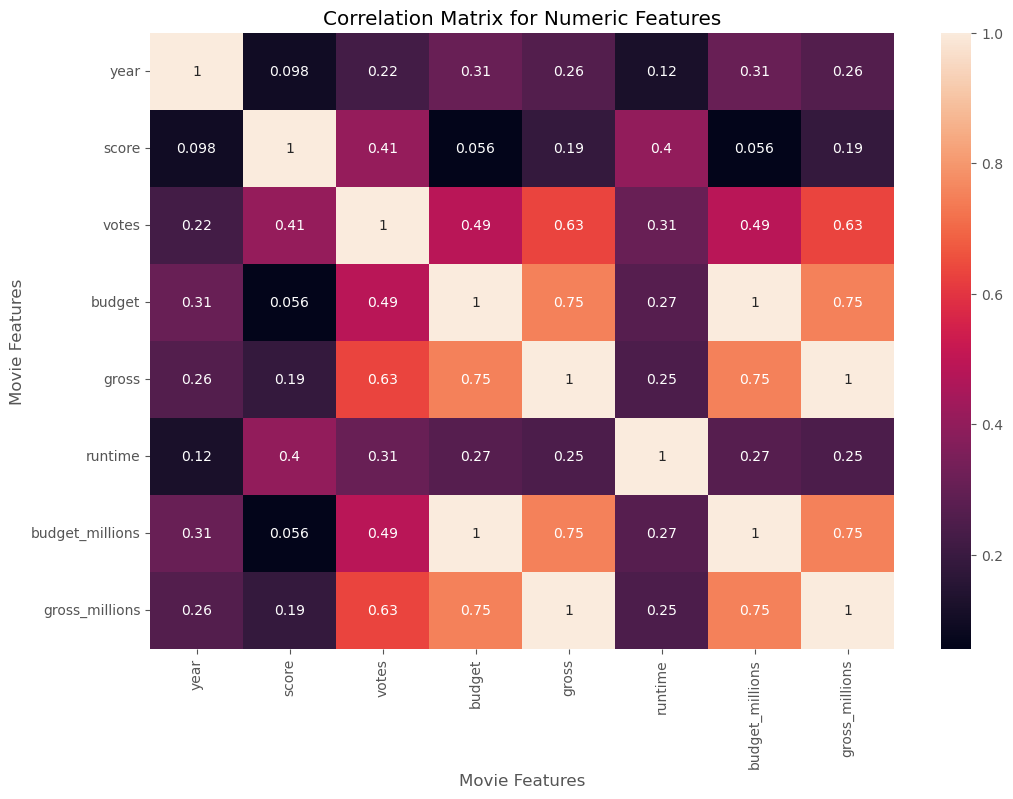

In [46]:
correlatin_matrix= df.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlatin_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [47]:
# Looks at Company 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_millions,gross_millions
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,237.0,2847.246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,356.0,2797.501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,200.0,2201.647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,245.0,2069.521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,321.0,2048.359754


In [64]:
df_numerized = df

for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_millions,gross_millions
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,-1,237.0,2847.246203
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,-1,356.0,2797.501328
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,-1,200.0,2201.647264
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,-1,245.0,2069.521700
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,-1,321.0,2048.359754


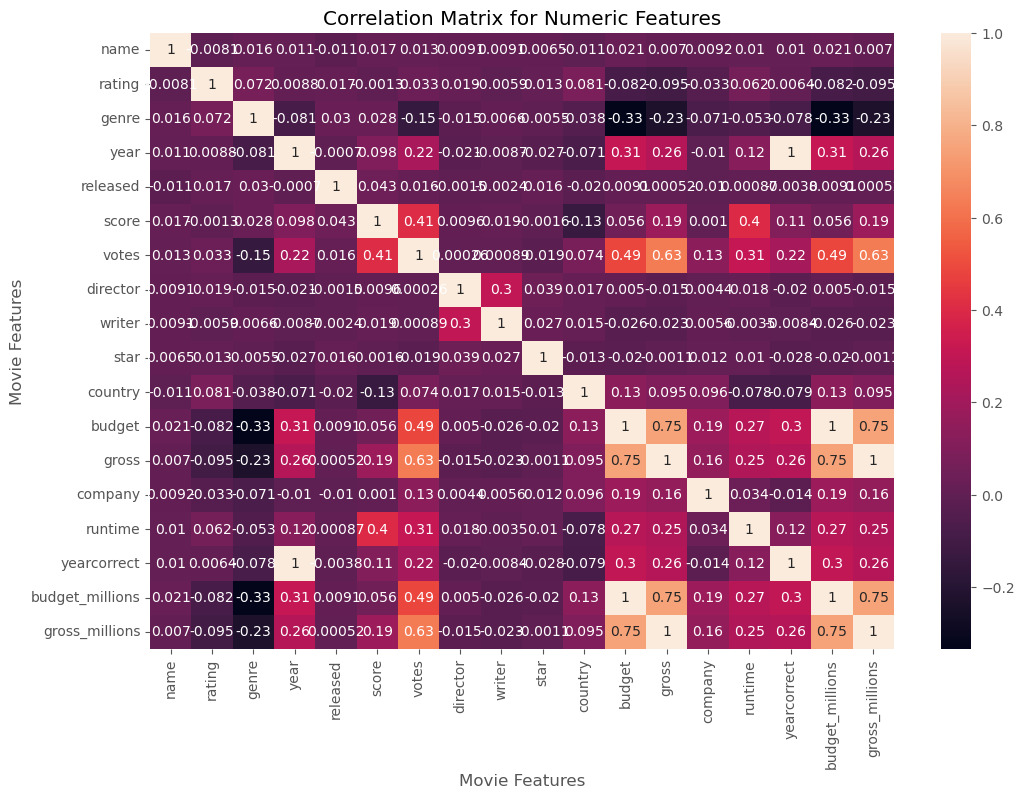

In [51]:
correlatin_matrix= df_numerized.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlatin_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()


In [52]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_millions,gross_millions
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225,0.020548,0.006989
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403,-0.081939,-0.095450
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210,-0.334021,-0.234297
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397,0.309212,0.261900
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775,0.009145,0.000519
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295,0.055665,0.186392
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218289,0.486862,0.632834
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385,0.004976,-0.014916
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391,-0.025911,-0.022997
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606,-0.019952,-0.001129


In [53]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released          -0.011311
                 score              0.017097
                 votes              0.013088
                 director           0.009079
                 writer             0.009081
                 star               0.006472
                 country           -0.010737
                 budget             0.020548
                 gross              0.006989
                 company            0.009211
                 runtime            0.010392
                 yearcorrect        0.010225
                 budget_millions    0.020548
                 gross_millions     0.006989
rating           name              -0.008069
                 rating             1.000000
                 genre              0.072423
                 year               0.008779
          

In [54]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget_millions  genre             -0.334021
budget           genre             -0.334021
genre            budget_millions   -0.334021
                 budget            -0.334021
                 gross_millions    -0.234297
gross_millions   genre             -0.234297
genre            gross             -0.234297
gross            genre             -0.234297
genre            votes             -0.145307
votes            genre             -0.145307
score            country           -0.133348
country          score             -0.133348
rating           gross             -0.095450
gross            rating            -0.095450
gross_millions   rating            -0.095450
rating           gross_millions    -0.095450
budget           rating            -0.081939
rating           budget            -0.081939
                 budget_millions   -0.081939
budget_millions  rating            -0.081939
genre            year              -0.081261
year             genre             -0.081261
country   

In [56]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

votes            gross              0.632834
gross            votes              0.632834
votes            gross_millions     0.632834
gross_millions   votes              0.632834
budget_millions  gross              0.750157
gross            budget_millions    0.750157
budget_millions  gross_millions     0.750157
gross_millions   budget_millions    0.750157
gross            budget             0.750157
budget           gross              0.750157
gross_millions   budget             0.750157
budget           gross_millions     0.750157
yearcorrect      year               0.996397
year             yearcorrect        0.996397
budget_millions  budget_millions    1.000000
name             name               1.000000
yearcorrect      yearcorrect        1.000000
rating           rating             1.000000
genre            genre              1.000000
year             year               1.000000
released         released           1.000000
score            score              1.000000
votes     

In [58]:
# We can conclude that Votes and Budget have the highest correlation to Gross Earnings and company has low correlation